In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics
import networkx as nx
import scipy

In [2]:
def load_data(fileName, path):
    data = [[],[],[]]
    for root,dirs, files in os.walk(path):
        for file in files:
            if file == fileName:
                content = pd.read_csv(os.path.join(root,file))
                data[int(root[-1]) - 1].append(content) 
        
    return data

In [3]:
# experiments path
exp_path = "C:/Users/ohm20/AppData/LocalLow/DefaultCompany/SEE/2023-02-21_02-11"

In [4]:
populations = load_data('population.csv',exp_path)
experiments = load_data('experiment.csv',exp_path)


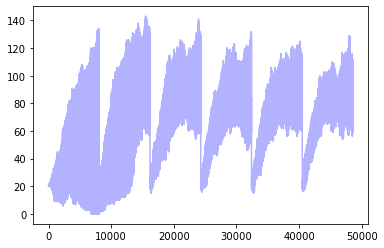

In [5]:
testplot0 = populations[0][0][" Population Every 100 Ticks"].plot(alpha=0.3,c='blue')

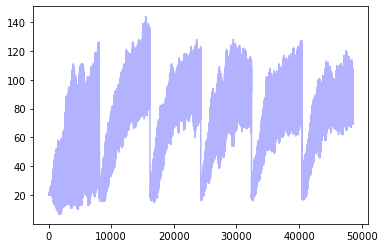

In [6]:
testplot1 = populations[1][0][" Population Every 100 Ticks"].plot(alpha=0.3,c='blue')

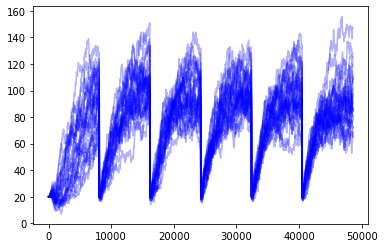

In [7]:
testplot2 = populations[2][6].groupby("Arena")[" Population Every 100 Ticks"].plot(alpha=0.3,c='blue')

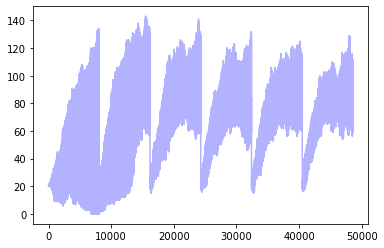

In [8]:
testplot2 = populations[0][0][" Population Every 100 Ticks"].plot(alpha=0.3,c='blue')

In [9]:
experiments[0][0]

,Arena,GeneSequence,Agent,Genitor,GenerationNum,FoodCollected,BirthTime,DeathTime,StartArena,LastArena,AttackEvents,DefenceEvents,NumOffspring,VisibleAgentsAtDeath,FoodEaten,FoodGivenToOthers,FoodTakenFromOthers
0,Arena0,0.1.8.5.8.7.2.4.1.0.0.8.6.3.2.7.1.2.6.7.4.2.1....,Agent11,NaN,0,0,1,1667,0,0,0,0,0,0,0.00000,0.000000,0.00000
1,Arena2,4.1.3.4.4.3.3.1.0.8.5.0.6.2.2.3.5.7.6.1.1.2.2....,Agent52,NaN,0,0,1,1718,2,2,0,0,0,0,0.00000,0.000000,0.00000
2,Arena19,1.0.8.6.3.1.0.8.1.0.0.8.3.1.1.3.8.6.1.3.5.2.6....,Agent390,NaN,0,0,1,1773,19,19,0,0,0,0,0.00000,0.000000,0.00000
3,Arena0,5.5.3.7.3.8.2.2.4.0.3.0.6.8.1.7.1.0.3.0.2.4.0....,Agent15,NaN,0,0,1,1831,0,0,0,0,0,0,0.00000,0.000000,0.00000
4,Arena4,3.1.4.2.5.8.1.1.0.0.2.8.3.6.3.3.2.7.0.3.1.3.3....,Agent88,NaN,0,0,1,1831,4,4,0,0,0,0,0.00000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73982,Arena26,5.4.2.1.6.5.6.7.1.1.1.3.1.1.0.6.0.0.2.0.0.3.7....,Agent70635,Agent69590,50,9,172452,2147483647,26,26,2,1,1,0,213.59700,29.403000,21.70208
73983,Arena26,0.2.4.2.1.1.1.1.3.0.6.3.2.1.0.0.3.7.0.6.6.6.6....,Agent73833,Agent71658,48,0,178713,2147483647,26,26,0,0,0,0,0.00000,0.000000,2.14291
73984,Arena26,0.4.1.4.3.7.7.8.0.1.1.1.1.1.0.3.6.4.2.6.2.0.0....,Agent71305,Agent68812,45,7,173754,2147483647,26,26,1,1,2,0,255.73550,39.264500,32.05940
73985,Arena26,0.4.4.2.1.8.1.2.1.0.6.0.1.2.2.0.0.3.7.0.0.6.6....,Agent71224,Agent68228,47,4,173610,2147483647,26,26,2,2,4,0,231.17700,31.823000,45.96075


In [10]:
modes = ["Low Dispersal", "High Dispersal", "Budding Dispersal"]

for i in range(len(modes)):
    totalsEaten = []
    totalsGiven = []
    for j in range(len(experiments[i])):               
        totalsEaten.append(experiments[i][j][" FoodEaten"].sum())
        totalsGiven.append(experiments[i][j][" FoodGivenToOthers"].sum())
    print(modes[i])
    print('Food Eaten')
    print(f'Total:{sum(totalsEaten)}')
    print(f'Avg: {sum(totalsEaten)/len(experiments[i])}')
    print(f'St.dev: {statistics.pstdev(totalsEaten)}')
    print("Food given to others")
    print(f'Total:{sum(totalsGiven)}')
    print(f'Avg: {sum(totalsGiven)/len(experiments[i])}')
    print(f'St.dev: {statistics.pstdev(totalsGiven)}')
    print(f'Ratio: {sum(totalsGiven)/sum(totalsEaten)}')
    print("=================")

Low Dispersal
Food Eaten
Total:58897950.88362999
Avg: 8413992.983375713
St.dev: 286550.8595498228
Food given to others
Total:10131477.754356999
Avg: 1447353.9649081428
St.dev: 38880.399154827915
Ratio: 0.1720174913109401
High Dispersal
Food Eaten
Total:62396709.81378999
Avg: 8913815.687684285
St.dev: 182071.4501020915
Food given to others
Total:10229388.863677
Avg: 1461341.2662395716
St.dev: 85643.7583338487
Ratio: 0.16394115802266634
Budding Dispersal
Food Eaten
Total:58148172.66013999
Avg: 8306881.808591427
St.dev: 317629.8575448567
Food given to others
Total:9711541.986021
Avg: 1387363.140860143
St.dev: 97853.02083638171
Ratio: 0.16701370897383622


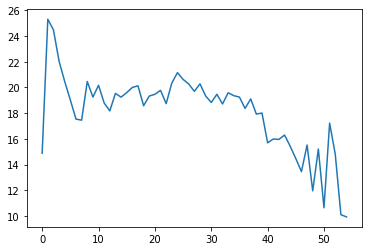

In [11]:
avgFoodGivenByGen  = []
for i in range(experiments[0][0][" GenerationNum"].max()-1):
    foodGiven = experiments[0][0][experiments[0][0][" GenerationNum"] == i][" FoodGivenToOthers"].sum()
    avgFoodGivenByGen.append(foodGiven/len(experiments[0][0][experiments[0][0][" GenerationNum"] == i]))

plt.plot(avgFoodGivenByGen)  

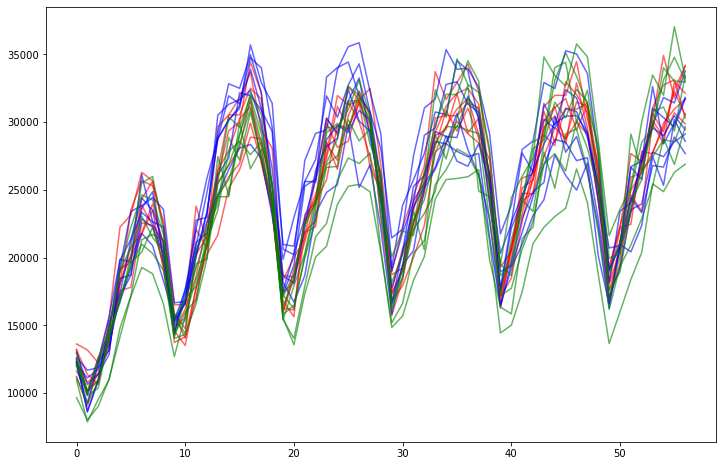

In [12]:
# FOOD given over time (buckets)
maxBirth = 180000
divisions = 60
agentLifeSpan = 9000
step = int(maxBirth/divisions)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
colors = ['r','b','g'] # LOW - HIGH - BUDDY
for i in range(len(modes)):
    avgGivenByMode = []
    #avgFoodGivenByGen  = []    
    
    for j in range(len(experiments[i])):    
        avgFoodGivenByTimeSlice = []
        for k in range(0,maxBirth-agentLifeSpan, step):
            tableSlice = experiments[i][j][(experiments[i][j][" BirthTime"] >= k) & (experiments[i][j][" BirthTime"] < k+step)]
            foodGiven = tableSlice[" FoodGivenToOthers"].sum() 
            if len(tableSlice)>0:
                avgFoodGivenByTimeSlice.append(foodGiven)
            else:
                print("Empty Slice")
        #avgGivenByMode.append(avgFoodGivenByExperiment)  
        ax.plot(range(0,len(avgFoodGivenByTimeSlice)),avgFoodGivenByTimeSlice,color=colors[i], alpha=0.6) 
        
    
plt.show()

In [25]:
# GENERIC PARAMETER over time (buckets)

def plotParameterOverTimeBuckets(parameter):
    maxBirth = 180000
    divisions = 60
    agentLifeSpan = 9000
    step = int(maxBirth/divisions)

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    colors = ['r','b','g'] # LOW - HIGH - BUDDY
    for i in range(len(modes)):
        avgGivenByMode = []
        #avgFoodGivenByGen  = []    

        for j in range(len(experiments[i])):    
            avgFoodGivenByTimeSlice = []
            for k in range(0,maxBirth-agentLifeSpan, step):
                tableSlice = experiments[i][j][(experiments[i][j][" BirthTime"] >= k) & (experiments[i][j][" BirthTime"] < k+step)]
                foodGiven = tableSlice[parameter].sum() 
                if len(tableSlice)>0:
                    avgFoodGivenByTimeSlice.append(foodGiven)
                else:
                    print("Empty Slice")
            #avgGivenByMode.append(avgFoodGivenByExperiment)  
            ax.plot(range(0,len(avgFoodGivenByTimeSlice)),avgFoodGivenByTimeSlice,color=colors[i], alpha=0.6) 

    plt.title(parameter+ " Over time slices")
    plt.show()

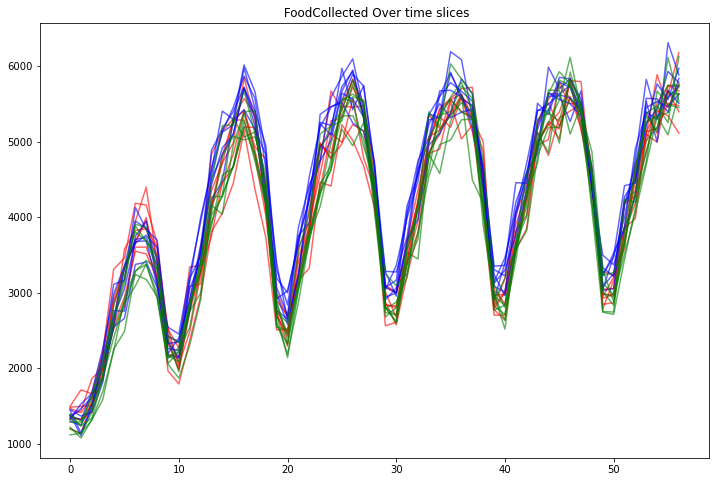

In [26]:
plotParameterOverTimeBuckets(" FoodCollected")

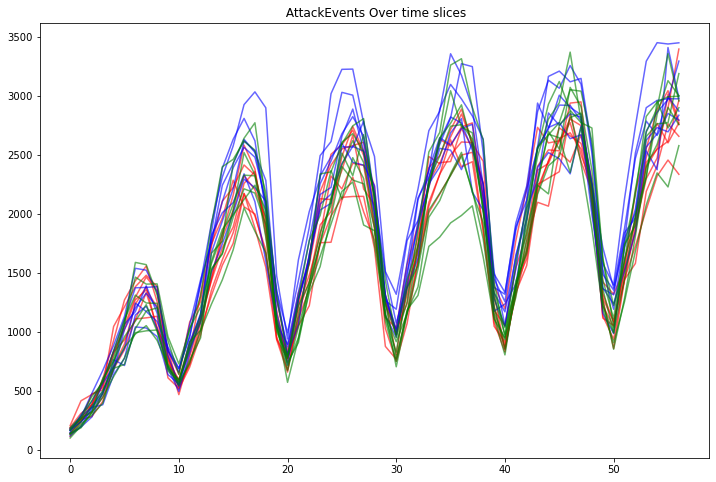

In [27]:
plotParameterOverTimeBuckets(" AttackEvents")

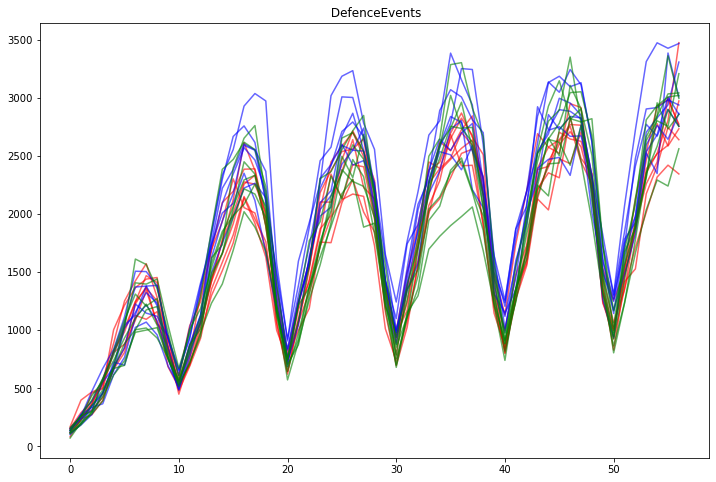

In [21]:
plotParameterOverTimeBuckets(" DefenceEvents") 

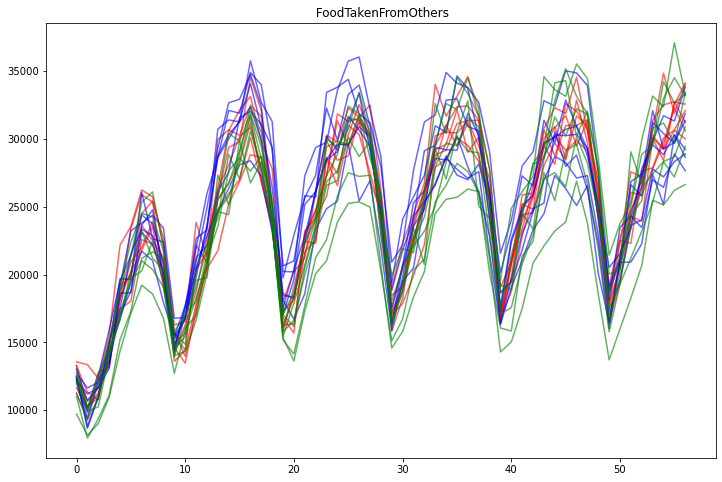

In [22]:
plotParameterOverTimeBuckets(" FoodTakenFromOthers") 

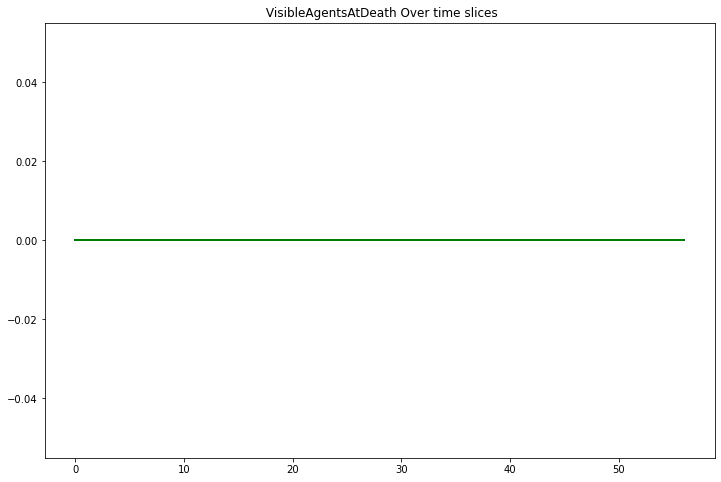

In [28]:
plotParameterOverTimeBuckets(" VisibleAgentsAtDeath") 

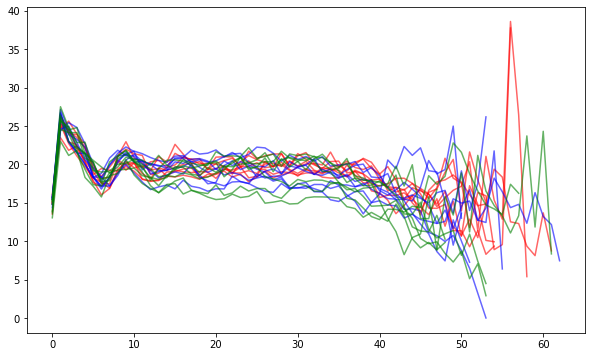

In [192]:
# Average FOOD given by generation - NOT a good measure
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
colors = ['r','b','g'] # LOW - HIGH - BUDDY

for i in range(len(modes)):
    avgGivenByMode = []
    #avgFoodGivenByGen  = []    
    
    for j in range(len(experiments[i])):    
        avgFoodGivenByExperiment = []
        for k in range(experiments[i][j][" GenerationNum"].max()-1):
            foodGiven = experiments[i][j][experiments[i][j][" GenerationNum"] == k][" FoodGivenToOthers"].sum()
            avgFoodGivenByExperiment.append(foodGiven/len(experiments[i][j][experiments[i][j][" GenerationNum"] == k]))
        avgGivenByMode.append(avgFoodGivenByExperiment)  
        ax.plot(range(0,experiments[i][j][" GenerationNum"].max()-1),avgFoodGivenByExperiment,color=colors[i], alpha=0.6)   
    
plt.show()
    

In [211]:
len(tableSlice)

0

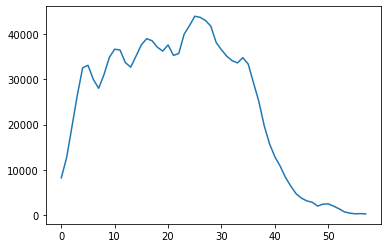

In [158]:
# not a good measure
foodGivenByGen = []
for i in range(len(modes)):
    totalsGiven = []
    for i in range(experiments[2][0][" GenerationNum"].max()-1):
        foodGiven = experiments[2][0][experiments[2][0][" GenerationNum"] == i][" FoodGivenToOthers"].sum()
        foodGivenByGen.append(foodGiven)

plt.plot(foodGivenByGen)                                 
                                  

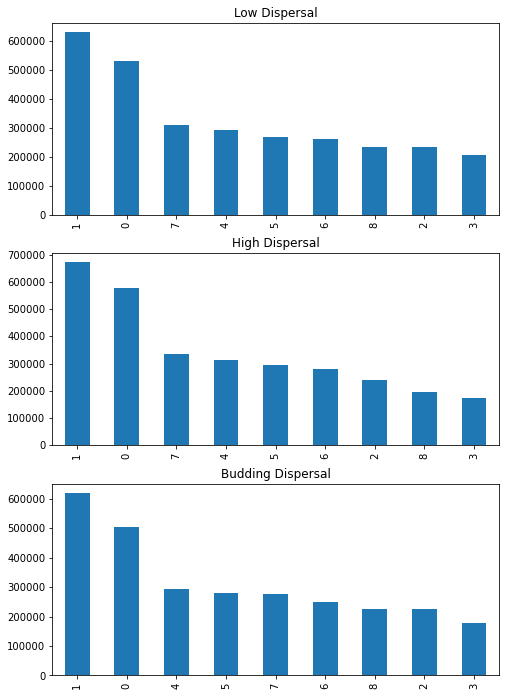

In [225]:
# gene frequency in the last 10% of time
for i in range(len(modes)):
    all_genes_last =[]
    plt.subplot(3,1,i+1)
    for j in range(len(experiments[i])):   
        for row in experiments[i][j][experiments[i][j][" BirthTime"] >= 162000][" GeneSequence"]:
            genes = row.split('.')
            all_genes_last += genes
    pd.DataFrame(all_genes_last)[0].value_counts().plot(kind='bar',figsize=(8, 12), title = modes[i])


In [ ]:
gene_data = []
for i in range(len(modes)):
    all_genes_last =[]
    plt.subplot(3,1,i+1)
    for j in range(len(experiments[i])):   
        for row in experiments[i][j][experiments[i][j][" DeathTime"] >= 27000][" GeneSequence"]:
            genes = row.split('.')
            all_genes_last += genes
    gene_data.append(all_genes_last)    
pd.DataFrame(gene_data)[0].value_counts().plot(kind='boxplot',figsize=(10, 10), title = modes[i])

In [ ]:
## network checks

In [104]:
agentsname = list(experiments[0][0][(experiments[0][0][" BirthTime"] <= 10000) & (experiments[0][0][" GenerationNum"] > 0)][' Agent'])
ancestors = list(experiments[0][0][(experiments[0][0][" BirthTime"] <=10000) & (experiments[0][0][" GenerationNum"] > 0 )][' Genitor'])
pairs = list(zip(agentsname,ancestors))

In [109]:
agentsname = list(experiments[0][0][experiments[0][0][" GenerationNum"] > 0][' Agent'])
ancestors = list(experiments[0][0][experiments[0][0][" GenerationNum"] > 0 ][' Genitor'])
pairs = list(zip(agentsname,ancestors))

In [105]:
nans = experiments[2][3][' Genitor'].isna().sum()
nans

540

In [111]:
print(len(agentsname))
print(len(ancestors))

73447
73447


In [110]:
g = nx.Graph()
g.add_edges_from(pairs)

In [45]:
len(g.nodes())

74135

In [116]:
pos = nx.spring_layout(g,iterations=5)
nx.draw(g, pos=pos)

KeyboardInterrupt: 

KeyboardInterrupt: 

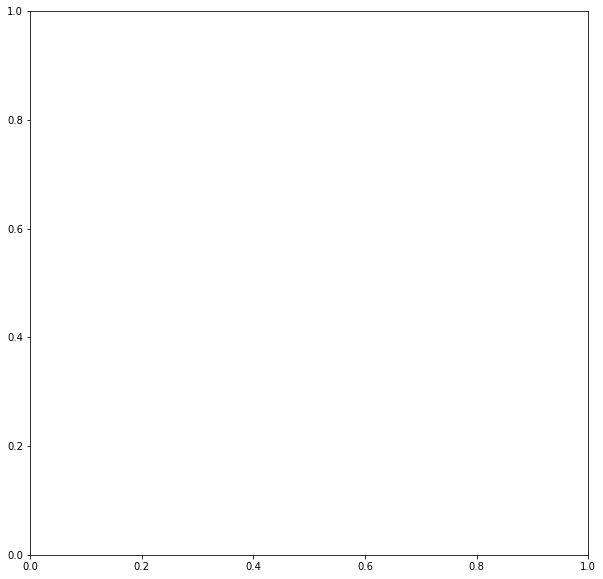

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10));
nx.draw_networkx(g, ax=ax)



In [62]:
nx.is_tree(g)


False

In [67]:
sorted(nx.simple_cycles(g2))

[]

In [70]:
nx.is_connected(g)

False

In [112]:
nx.write_gexf(g, "nonanstest.gexf")

In [115]:
nx.number_connected_components(g)

315

In [113]:
g2 = nx.DiGraph()
g2.add_edges_from(pairs)

In [114]:
nx.number_strongly_connected_components(g2)

73762

In [ ]:
[len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]


In [123]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
topComp = nx.Graph()
for i in range(1):
    gc = g.subgraph(Gcc[i])
    topComp = nx.compose(topComp,gc)

In [124]:
len(topComp.nodes())

4698

In [125]:
nx.write_gexf(topComp, "topcomp0.gexf")